<a href="https://colab.research.google.com/github/AgustinCdeCelis/Decision-Tree/blob/main/RainTree_and_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib
%matplotlib inline

In [ ]:
link = 'https://raw.githubusercontent.com/AgustinCdeCelis/Decision-Tree/main/weatherAUS.csv'

In [ ]:
raintree_df = pd.read_csv(link)

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = 10,6



In [ ]:
raintree_df.head(5)

In [ ]:
raintree_df.info()

Eliminando las filas de Null Values de Rain Tomorrow

In [ ]:
raintree_df.dropna(subset=['RainTomorrow'],inplace=True)

Vemos cómo están algunos de los features a partir de gráficos

In [ ]:
fig = px.histogram(raintree_df,x='MaxTemp',marginal ='box',color='RainTomorrow',color_discrete_sequence=['blue','green'],title='Max Temp and Rain Tomorrow')
fig.update_layout(bargap =0.1)
fig.show()
#Max Temp

In [ ]:
fig = px.histogram(raintree_df,x= 'RainToday',color='RainTomorrow',color_discrete_sequence=['darkgreen','lightgreen'],title='Rain Today and Rain Tomorrow')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig=px.histogram(raintree_df,x='Humidity3pm',marginal='box',color='RainTomorrow',title='3pm Humidity and Rain Tomorrow')
fig.update_layout(bargap=0.1)
fig.show()


**Train Test Split:**


1.   Train_df
2.   Val_df
3.   Test_df


In [ ]:
raintree_df['year'] =pd.to_datetime(raintree_df['Date']).dt.year

In [ ]:
matplotlib.rcParams['figure.figsize'] = 16,6
plt.title('Valores Anuales en el Dataset')
sns.countplot(data=raintree_df,x='year',palette='crest');

In [ ]:
from sklearn.model_selection import train_test_split
#Usamos este método en vez de seleccionar anualmente

In [ ]:
train_val_df , test_df = train_test_split(raintree_df,test_size=0.2, random_state=42)
train_df , val_df =train_test_split(train_val_df,test_size=0.25 , random_state=42)

In [ ]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

**Select Features and Target**

In [ ]:
input_column = list(train_df.columns)[1:-2]


In [ ]:
target_column = 'RainTomorrow'

In [ ]:
train_input= train_df[input_column].copy()
train_target= train_df[target_column].copy()

In [ ]:
val_input = val_df[input_column].copy()
val_target = val_df[target_column].copy()

In [ ]:
test_input = test_df[input_column].copy()
test_target= test_df[target_column].copy()

**SELECT Numeric and Categorical Features**

In [ ]:
train_input

In [ ]:
numeric_cols = train_input.select_dtypes(include=np.number).columns.tolist()

In [ ]:
numeric_cols

In [ ]:
categorical_cols = train_input.select_dtypes(include='object').columns.tolist()
categorical_cols

**Imputing Missing  Values from numeric Cols**

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='mean').fit(raintree_df[numeric_cols])

In [ ]:
train_input[numeric_cols] = imputer.transform(train_input[numeric_cols])
val_input[numeric_cols]   = imputer.transform(val_input[numeric_cols])
test_input[numeric_cols]  =imputer.transform(test_input[numeric_cols])

In [ ]:
train_input[numeric_cols].isna().sum()

**Scaling numeric values**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler =MinMaxScaler()

In [ ]:
scaler.fit(raintree_df[numeric_cols])

In [ ]:
print("the Max Values ",scaler.data_max_)
print("the Min Values ",scaler.data_min_)

In [ ]:
train_input[numeric_cols]=scaler.transform(train_input[numeric_cols])
val_input[numeric_cols]  =scaler.transform(val_input[numeric_cols])
test_input[numeric_cols] =scaler.transform(test_input[numeric_cols])

In [ ]:
train_input.describe().loc[['min','max']]

In [ ]:
val_input.describe().loc[['min', 'max']]

**OneHotEncoder Categorical Values**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc = OneHotEncoder(sparse=False,handle_unknown='ignore')

In [ ]:
enc.fit(raintree_df[categorical_cols])

In [ ]:
enc.categories_

In [ ]:
encoded_cols=enc.get_feature_names(categorical_cols)

In [ ]:
train_input[encoded_cols]= enc.transform(train_input[categorical_cols])
val_input[encoded_cols]  =enc.transform(val_input[categorical_cols])
test_input[encoded_cols] = enc.transform(test_input[categorical_cols])

**Concatenate the Encoded Cols with the numeric cols**

In [ ]:
x_train = pd.concat([train_input[encoded_cols],train_input[numeric_cols]],axis=1)

In [ ]:
x_val = pd.concat([val_input[encoded_cols],val_input[numeric_cols]],axis=1)

In [ ]:
x_test = pd.concat([test_input[encoded_cols],test_input[numeric_cols]],axis=1)

In [ ]:
x_train
#The Dataframe

**The Machine Learning Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(random_state=42)

In [ ]:
%%time
model.fit(x_train,train_target)

In [ ]:
train_pred= model.predict(x_train)
train_pred

In [ ]:
from sklearn.metrics import accuracy_score
#Check the model accuracy

In [ ]:
print("the model accuracy is ",accuracy_score( train_target,train_pred))


In [ ]:
train_prob = model.predict_proba(x_train)
train_prob

**Ahora checkear la predicción, y la accuracy del val model**

In [ ]:
model.fit(x_val,val_target)

In [ ]:
val_pred = model.predict(x_val)

In [ ]:
accuracy_score(val_target, val_pred)

In [ ]:
val_target.value_counts() / len(val_target)

In [ ]:
#Otra forma de hacerlo mas rápido
model.score(x_val,val_target)

**Checkeando validation Score del Test set**

In [ ]:
model.score(x_test, test_target)

In [ ]:
test_target. value_counts() / len(test_target)

**Visualización del modelo**

In [ ]:
from sklearn.tree import plot_tree, export_text

In [ ]:
matplotlib.rcParams['figure.figsize']=100,12
plot_tree(model,feature_names=x_train.columns, max_depth=3,filled=True);

In [ ]:
model.tree_.max_depth

In [ ]:
matplotlib.rcParams['figure.figsize']=160,12
text_tree = export_text(model, feature_names= list(x_train.columns),max_depth=12)
print(text_tree[:5000])

In [ ]:
list(x_train.columns)

In [ ]:
model.feature_importances_


**The Feature importance DataFrame**

In [ ]:
importance_df = pd.DataFrame({"feature" : x_train.columns, "importance" : model.feature_importances_ }).sort_values("importance",ascending=False)

In [ ]:
importance_df

In [ ]:
plt.title('Feature importance')
matplotlib.rcParams['figure.figsize']=8,5
sns.barplot(data=importance_df.head(10),x="importance",y="feature");

In [ ]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth= md, random_state= 42)
    model. fit(x_train, train_target)
    train_error = 1 - model.score(x_train, train_target)
    val_error   = 1 - model.score(x_val, val_target)
    test_error = 1 - model.score(x_test, test_target)
    return {'max depth': md, 'training error': train_error, 'validation error': val_error, 'test error': test_error}

In [ ]:
%%time
error_df = pd.DataFrame([max_depth_error(md) for md in range(1,21)])

In [ ]:
error_df

In [ ]:
plt.plot(error_df['max depth'], error_df['training error'] )
plt.plot(error_df['max depth'], error_df['validation error'])
plt.plot(error_df['max depth'], error_df['test error']);

Como se puede observar en el gráfico y en el cuadro, el nivel de max depth adecuado para poder generalizar el modelo con el nivel más bajo de error es el nivel 7 de profundidad del modelo. **Regularize the overfitting**

In [ ]:
model = DecisionTreeClassifier(max_depth= 7, random_state= 42).fit(x_train,train_target)

In [ ]:
model.score(x_train,train_target) , model.score(x_val,val_target)
#Compare both Scores, but i´ve to check with fitting different

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
model = RandomForestClassifier(n_jobs=-1, random_state= 42)

In [ ]:
model.fit(x_train,train_target)

In [ ]:
print("the model accuracy ",model.score(x_train,train_target))
print("the model accuracy ",model.score(x_val , val_target))
print("the model accuracy ", model.score(x_test, test_target))

In [ ]:
model.predict(x_train)

In [ ]:
model.predict_proba(x_train)

In [ ]:
print("cantidad de decision trees:" ,len(model.estimators_))

In [ ]:
model.estimators_[50].get_params

In [ ]:
matplotlib.rcParams['figure.figsize'] = 80,20
plot_tree(model.estimators_[0],max_depth=3,feature_names=x_train.columns,filled=True,rounded=True );

In [ ]:
matplotlib.rcParams['figure.figsize'] = 80,20
plot_tree(model.estimators_[20],max_depth=3,feature_names=x_train.columns,filled=True,rounded=True );

In [ ]:
importance_df = pd.DataFrame({'feature': x_train.columns, 'importance': model.feature_importances_}).sort_values('importance',ascending=False)
importance_df.head(10)

In [ ]:
matplotlib.rcParams['figure.figsize'] = 12,6
sns.barplot(data=importance_df.head(10), x= 'importance', y='feature');

In [ ]:
def random_forest(num): 
    model = RandomForestClassifier(random_state=42, n_jobs=-1,n_estimators=num )
    model.fit(x_train,train_target)
    train_error =1-model.score(x_train,train_target)
    val_error   =1-model.score(x_val,val_target)
    test_error  =1-model.score(x_test, test_target)
    return {'num estimators':num, 'train error':train_error, 'validation error' : val_error, 'test error' : test_error}

In [93]:
%%time
error_df = pd.DataFrame([random_forest(num) for num in range(50,60)])

CPU times: user 4min 35s, sys: 1.89 s, total: 4min 37s
Wall time: 2min 45s


In [94]:
error_df

,num estimators,train error,validation error,test error
0,50,0.000340,0.145118,0.149654
1,51,0.000199,0.144485,0.149337
2,52,0.000328,0.144801,0.149267
3,53,0.000188,0.144696,0.149197
4,54,0.000246,0.144836,0.149689
5,55,0.000152,0.144801,0.148986
6,56,0.000258,0.144133,0.149197
7,57,0.000152,0.144696,0.148950
8,58,0.000234,0.144344,0.149232
9,59,0.000164,0.144098,0.148845


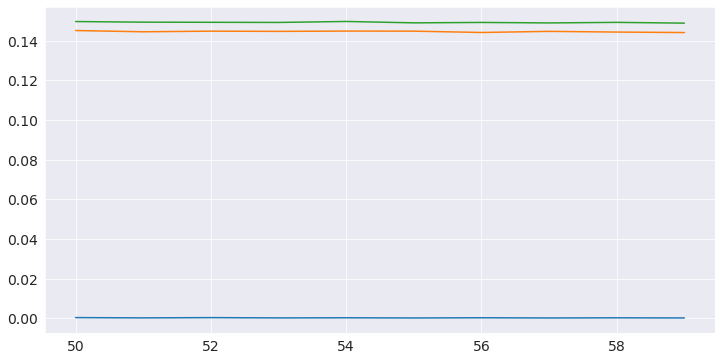

In [95]:
plt.plot(error_df['num estimators'],error_df['train error'])
plt.plot(error_df['num estimators'], error_df['validation error'])
plt.plot(error_df['num estimators'], error_df['test error'])

**RANDOM FOREST**

In [96]:
model = RandomForestClassifier(random_state= 42, n_jobs=-1,n_estimators=500)

In [97]:
model.fit(x_train,train_target)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

**SCORE**

In [98]:
model.score(x_train,train_target)

0.9999648361952763

In [99]:
model.score(x_train,train_target)

0.9999648361952763

**ERROR**

In [100]:
1 - model.score(x_val,val_target)

0.1445198495024438